# Proyecto: Boosting Algorithms

## Importar librerías necesarias

In [38]:
# Manejo de datos
import pandas as pd
import numpy as np

# Modelado con XGBoost
from xgboost import XGBClassifier, plot_importance

# División de datos y optimización de hiperparámetros
from sklearn.model_selection import train_test_split, GridSearchCV

# Métricas de evaluación
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    ConfusionMatrixDisplay
)

# Visualización
import matplotlib.pyplot as plt

# Guardado y carga de modelos
import os
import pickle

# Interpretabilidad
import shap

## Cargar dataset de train y test

In [3]:
# Extraer el dataset de entrenamiento y prueba
df_train = pd.read_csv('/workspaces/efrainnalmeida-boosting-algorithms/data/processed/clean_train.csv')
df_test = pd.read_csv('/workspaces/efrainnalmeida-boosting-algorithms/data/processed/clean_test.csv')

In [4]:
# Dividir el dataset en conjunto de entrenamiento y prueba
X_train = df_train.drop('Outcome', axis=1)
y_train = df_train['Outcome']
X_test = df_test.drop('Outcome', axis=1)
y_test = df_test['Outcome']

# Mostrar las dimensiones de los conjuntos de entrenamiento y prueba
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 6), (154, 6), (614,), (154,))

In [5]:
# Mostrar las primeras filas del conjunto de entrenamiento
X_train.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
0,1,90.0,62.0,27.2,0.580,24
1,5,126.0,78.0,29.6,0.439,40
2,2,105.0,58.0,34.9,0.225,25
3,1,146.0,56.0,29.7,0.564,29
4,0,95.0,64.0,44.6,0.366,22


In [6]:
# Mostrar las primeras filas del conjunto de prueba
X_test.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
0,7,159.0,64.0,27.4,0.294,40
1,10,68.0,106.0,35.5,0.285,47
2,2,122.0,76.0,35.9,0.483,26
3,7,114.0,64.0,27.4,0.732,34
4,2,74.0,72.0,32.3,0.102,22


In [7]:
# Mostrar las primeras filas de la variable objetivo del conjunto de entrenamiento
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: Outcome, dtype: int64

In [8]:
# Mostrar las primeras filas de la variable objetivo del conjunto de prueba
y_test.head()

0    0
1    0
2    0
3    1
4    0
Name: Outcome, dtype: int64

## Boosting Algorithm

In [11]:
# Definir el modelo base
xgb_model = XGBClassifier(
    eval_metric='logloss',    # Métrica estándar para binario
    random_state=42
)

In [12]:
# Entrenar el modelo
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [13]:
# Hacer predicciones
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

In [14]:
# Calcular métricas básicas
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

# Mostrar resultados
print("📊 Resultados del Primer Modelo XGBoost")
print("-------------------------------------------")
print(f"🔵 Accuracy: {round(accuracy_xgb, 4)}")
print(f"🟠 Recall:   {round(recall_xgb, 4)}")
print(f"🟣 F1 Score: {round(f1_xgb, 4)}")
print(f"🟢 AUC:      {round(auc_xgb, 4)}")
print("-------------------------------------------")

📊 Resultados del Primer Modelo XGBoost
-------------------------------------------
🔵 Accuracy: 0.7468
🟠 Recall:   0.5926
🟣 F1 Score: 0.6214
🟢 AUC:      0.8022
-------------------------------------------


In [ ]:
# Buscar el mejor threshold que maximice el F1 Score

# Definir thresholds de 0.1 a 0.9 en pasos de 0.01
thresholds_xgb = np.linspace(0.1, 0.9, 81)
f1_scores_xgb = []

# Calcular F1 Score para cada threshold
for thresh in thresholds_xgb:
    y_pred_thresh_xgb = (y_pred_proba_xgb >= thresh).astype(int)
    f1_scores_xgb.append(f1_score(y_test, y_pred_thresh_xgb))

# Seleccionar el threshold óptimo
best_thresh_xgb = thresholds_xgb[np.argmax(f1_scores_xgb)]
best_f1_xgb = max(f1_scores_xgb)

# Mostrar el mejor threshold y su F1 Score asociado
print("🔎 Búsqueda del Mejor Threshold para F1 Score (XGBoost)")
print("-------------------------------------------")
print(f"⭐ Mejor Threshold: {best_thresh_xgb:.2f}")
print(f"🎯 Mejor F1 Score:  {best_f1_xgb:.4f}")
print("-------------------------------------------")

🔎 Búsqueda del Mejor Threshold para F1 Score (XGBoost)
-------------------------------------------
⭐ Mejor Threshold: 0.15
🎯 Mejor F1 Score:  0.6613
-------------------------------------------


In [16]:
# Aplicar el threshold óptimo y recalcular métricas

# Aplicar el mejor threshold
y_pred_xgb_opt = (y_pred_proba_xgb >= best_thresh_xgb).astype(int)

# Calcular métricas usando el nuevo threshold
accuracy_xgb_opt = accuracy_score(y_test, y_pred_xgb_opt)
recall_xgb_opt = recall_score(y_test, y_pred_xgb_opt)
f1_xgb_opt = f1_score(y_test, y_pred_xgb_opt)
auc_xgb_opt = roc_auc_score(y_test, y_pred_proba_xgb)  # El AUC no cambia

# Mostrar resultados finales
print("📊 Resultados del XGBoost usando el Threshold Óptimo")
print("-------------------------------------------")
print(f"🔵 Accuracy: {round(accuracy_xgb_opt, 4)}")
print(f"🟠 Recall:   {round(recall_xgb_opt, 4)}")
print(f"🟣 F1 Score: {round(f1_xgb_opt, 4)}")
print(f"🟢 AUC:      {round(auc_xgb_opt, 4)}")
print("-------------------------------------------")

📊 Resultados del XGBoost usando el Threshold Óptimo
-------------------------------------------
🔵 Accuracy: 0.7273
🟠 Recall:   0.7593
🟣 F1 Score: 0.6613
🟢 AUC:      0.8022
-------------------------------------------


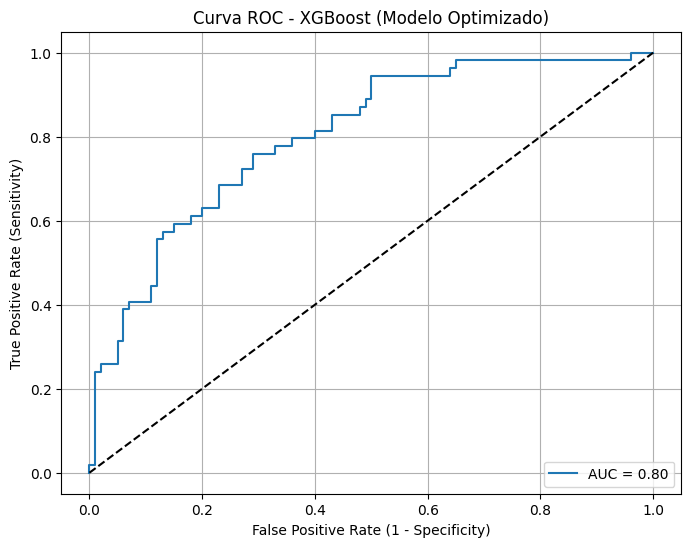

In [17]:
# Calcular la curva ROC
fpr_xgb, tpr_xgb, thresholds_roc_xgb = roc_curve(y_test, y_pred_proba_xgb)

# Graficar la curva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr_xgb, tpr_xgb, label=f'AUC = {auc_xgb_opt:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal de referencia
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Curva ROC - XGBoost (Modelo Optimizado)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

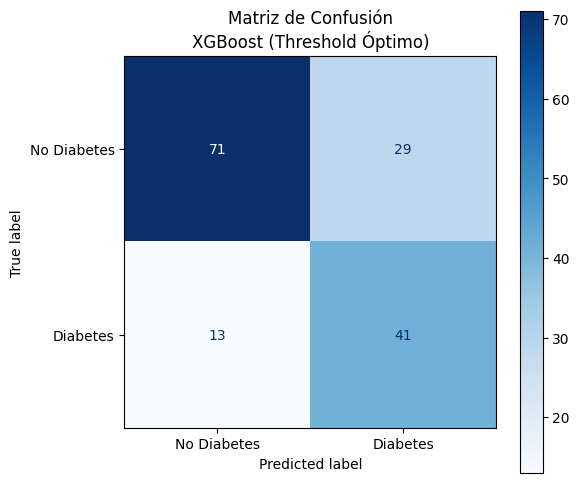

In [19]:
# Calcular la matriz de confusión usando el threshold óptimo
cm_xgb = confusion_matrix(y_test, y_pred_xgb_opt)

# Visualizar la matriz
fig, ax = plt.subplots(figsize=(6,6))
cmd_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=["No Diabetes", "Diabetes"])
cmd_xgb.plot(ax=ax, cmap='Blues', values_format='d')

plt.title('Matriz de Confusión\nXGBoost (Threshold Óptimo)')
plt.grid(False)
plt.show()

<Figure size 1000x600 with 0 Axes>

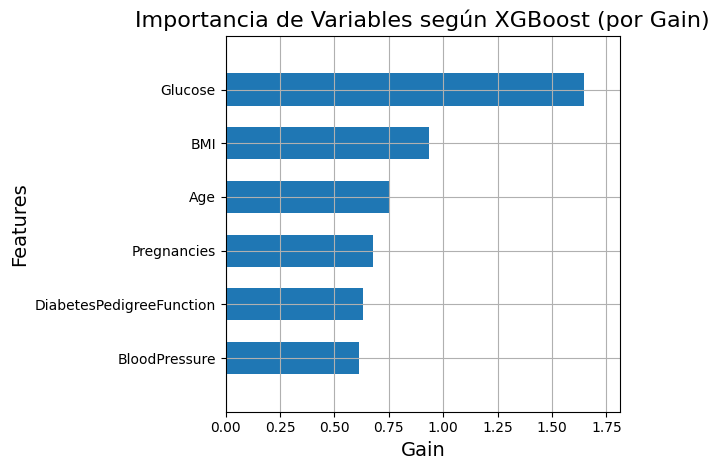

In [ ]:
# Graficar importancia de variables
plt.figure(figsize=(10, 6))
ax = plot_importance(
    xgb_model, 
    importance_type='gain', 
    height=0.6,                    
    show_values=False             
)
plt.title('Importancia de Variables según XGBoost (por Gain)', fontsize=16)
plt.xlabel('Gain', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

## Optimización

In [26]:
# Definir el modelo base
xgb_base = XGBClassifier(
    eval_metric='logloss',  # Muy importante para clasificación binaria
    random_state=42
)

# Definir el espacio de búsqueda optimizado
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Configurar el GridSearchCV
grid_search_xgb = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_grid,
    scoring='roc_auc',     
    cv=5,
    n_jobs=-1,
    verbose=2,
    return_train_score=True
)

# Ejecutar la búsqueda
grid_search_xgb.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("✅ Mejores hiperparámetros encontrados:")
print(grid_search_xgb.best_params_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END c

In [27]:
# Usar el mejor modelo encontrado por GridSearchCV
xgb_best = grid_search_xgb.best_estimator_

In [28]:
# Predecir probabilidades sobre el conjunto de prueba
y_pred_proba_xgb_best = xgb_best.predict_proba(X_test)[:, 1]

In [29]:
# 📈 Buscar el mejor threshold que maximiza el F1 Score
thresholds = np.linspace(0.1, 0.9, 81)
f1_scores = []

for thresh in thresholds:
    y_pred_thresh = (y_pred_proba_xgb_best >= thresh).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_thresh))

best_thresh = thresholds[np.argmax(f1_scores)]
best_f1 = max(f1_scores)

# Mostrar el mejor threshold
print("🔎 Mejor threshold para maximizar F1")
print("-----------------------------------")
print(f"⭐ Mejor Threshold: {best_thresh:.2f}")
print(f"🎯 Mejor F1 Score:  {best_f1:.4f}")
print("-----------------------------------")

🔎 Mejor threshold para maximizar F1
-----------------------------------
⭐ Mejor Threshold: 0.35
🎯 Mejor F1 Score:  0.6935
-----------------------------------


In [30]:
# 📊 Aplicar el mejor threshold y recalcular métricas
y_pred_xgb_best_opt = (y_pred_proba_xgb_best >= best_thresh).astype(int)

accuracy_best = accuracy_score(y_test, y_pred_xgb_best_opt)
recall_best = recall_score(y_test, y_pred_xgb_best_opt)
f1_best = f1_score(y_test, y_pred_xgb_best_opt)
auc_best = roc_auc_score(y_test, y_pred_proba_xgb_best)

# Mostrar métricas finales
print("📊 Resultados del Mejor Modelo XGBoost")
print("-----------------------------------")
print(f"🔵 Accuracy: {round(accuracy_best, 4)}")
print(f"🟠 Recall:   {round(recall_best, 4)}")
print(f"🟣 F1 Score: {round(f1_best, 4)}")
print(f"🟢 AUC:      {round(auc_best, 4)}")
print("-----------------------------------")

📊 Resultados del Mejor Modelo XGBoost
-----------------------------------
🔵 Accuracy: 0.7532
🟠 Recall:   0.7963
🟣 F1 Score: 0.6935
🟢 AUC:      0.8209
-----------------------------------


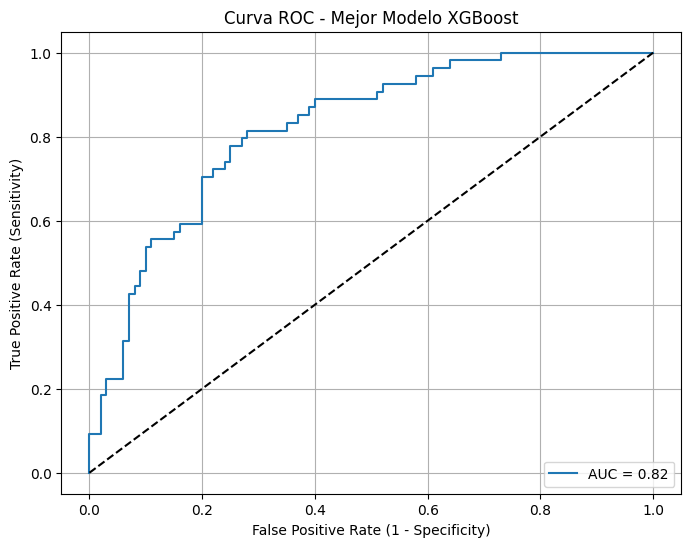

In [31]:
# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_xgb_best)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {auc_best:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Curva ROC - Mejor Modelo XGBoost')
plt.legend(loc='lower right')
plt.grid()
plt.show()

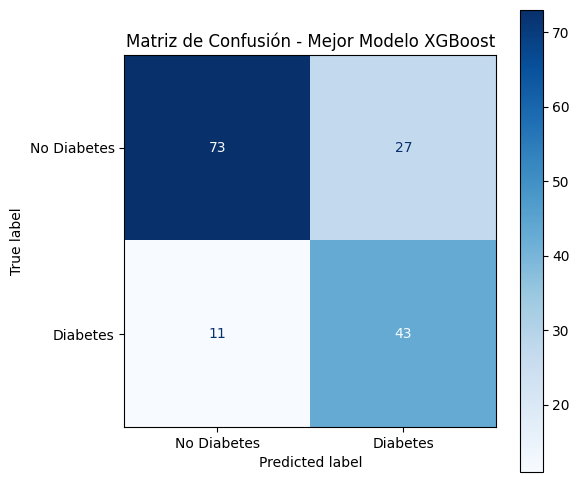

In [32]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_xgb_best_opt)

fig, ax = plt.subplots(figsize=(6,6))
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Diabetes", "Diabetes"])
cmd.plot(ax=ax, cmap='Blues', values_format='d')
plt.title('Matriz de Confusión - Mejor Modelo XGBoost')
plt.grid(False)
plt.show()

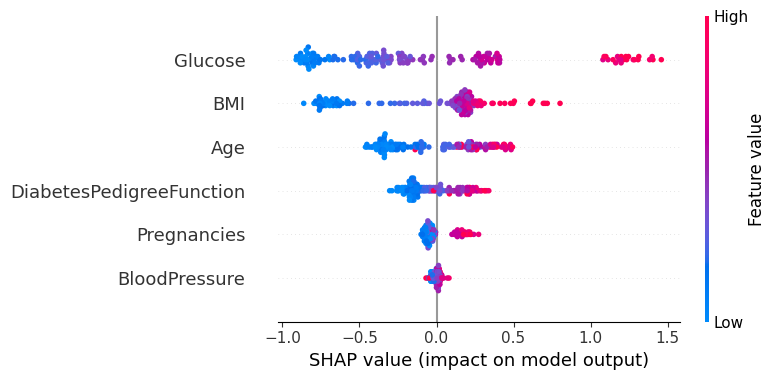

In [33]:
# Crear un TreeExplainer para el mejor modelo
explainer = shap.TreeExplainer(xgb_best)

# Calcular los valores SHAP para el conjunto de test
shap_values = explainer.shap_values(X_test)

# Mostrar el resumen global
shap.summary_plot(shap_values, X_test)

<Figure size 1000x600 with 0 Axes>

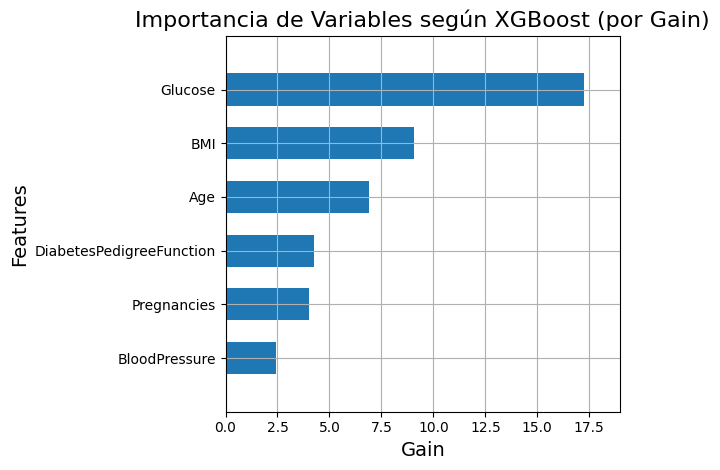

In [34]:
# Graficar la importancia de variables usando el mejor modelo encontrado
plt.figure(figsize=(10, 6))
ax = plot_importance(
    xgb_best,                   # Usar el modelo optimizado
    importance_type='gain',      # Importancia basada en ganancia
    height=0.6,                  # Barras más gruesas
    show_values=False            # No mostrar los valores numéricos sobre las barras
)
plt.title('Importancia de Variables según XGBoost (por Gain)', fontsize=16)
plt.xlabel('Gain', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

## Guardar el modelo

In [35]:
# Guardar el modelo entrenado en un archivo .pkl
modelo_guardado_path = '/workspaces/efrainnalmeida-boosting-algorithms/models/xgb_best.pkl'

with open(modelo_guardado_path, 'wb') as archivo_salida:
    pickle.dump(xgb_best, archivo_salida)

print(f"✅ Modelo guardado como: {modelo_guardado_path}")

✅ Modelo guardado como: /workspaces/efrainnalmeida-boosting-algorithms/models/xgb_best.pkl


## Cargar el modelo

In [36]:
# Cargar el modelo guardado
with open('/workspaces/efrainnalmeida-boosting-algorithms/models/xgb_best.pkl', 'rb') as archivo_entrada:
    xgb_loaded = pickle.load(archivo_entrada)

print("✅ Modelo cargado exitosamente.")

✅ Modelo cargado exitosamente.


In [37]:
# Usar xgb_loaded para hacer predicciones, por ejemplo:
y_pred_loaded = xgb_loaded.predict(X_test)

y_pred_loaded

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])